In [1]:
import l2f_tda as tda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
%matplotlib inline

Using TensorFlow backend.


In [2]:
import pickle as pkl
zDataFrame = pkl.load(open('example_time_series.pkl', 'rb'))
regimeDataFrame = pkl.load(open('example_regime.pkl', 'rb'))

In [3]:
X = [ zDataFrame, regimeDataFrame ]

(50000, 1)


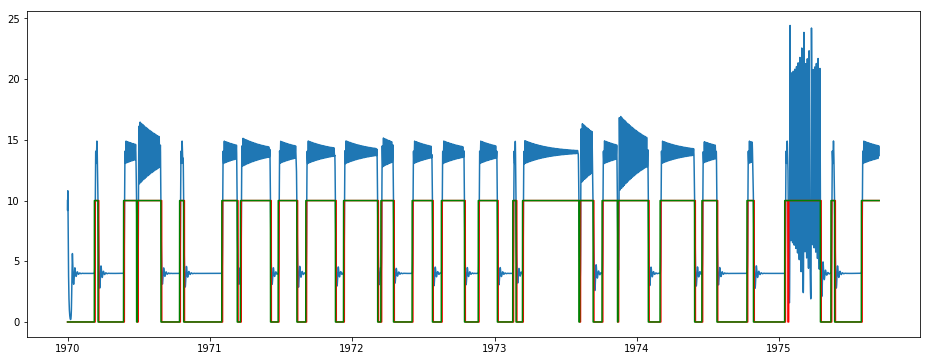

In [4]:
fig = plt.figure(figsize=(16,6))

plt.plot(zDataFrame)
plt.plot(10*regimeDataFrame[0], color='r')
plt.plot(10*regimeDataFrame[1], color='g')
print(zDataFrame.shape)

In [5]:
outerWindowDuration = 200
outerWindowStride = 20
innerWindowDuration = 10
innerWindowStride = 2
embedder = tda.TakensEmbedder(outerWindowDuration, outerWindowStride, innerWindowDuration, innerWindowStride)

In [6]:
embedder.fit(X)
embeddedZ = embedder.transform(X)[0]
embeddedRegime = embedder.transform(X)[1]
print(embeddedZ.shape, embeddedRegime.shape)

2491 96
2491 96
(2491, 96, 10) (2491, 1, 400)


In [7]:
embeddedRegime_shape = embeddedRegime.shape
embeddedRegime_plot = embeddedRegime.reshape((-1, embeddedRegime_shape[2]//2, 2))

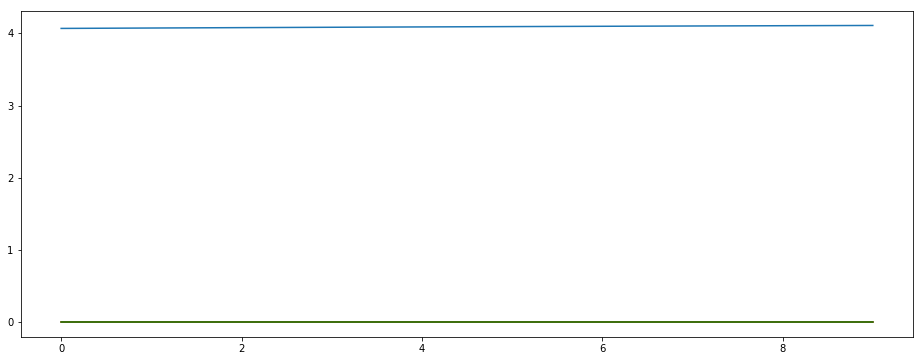

In [8]:
fig = plt.figure(figsize=(16,6))
stride = embeddedRegime_plot.shape[1] // embeddedZ.shape[2]

outerWindow = 29
plt.plot(embeddedZ[outerWindow,0,:])
plt.plot(10*embeddedRegime_plot[outerWindow,:embeddedZ.shape[2], 0], color='r')
plt.plot(10*embeddedRegime_plot[outerWindow,:embeddedZ.shape[2], 1], color='g')

In [9]:
import pickle as pkl
pkl.dump(embeddedZ, open('example_embedded_time_series.pkl', 'wb'))
pkl.dump(embeddedRegime, open('example_embedded_regime.pkl', 'wb'))